# Pymaceuticals Inc.
---

### Analysis

1. Infubinol has one outliner
2. Capomulin and Ramicane shows most effienct tumor reduce result in a box plot with latest timepoint amoung 4 drugs
2. The correlation between mouse weight and the average tumor volume is 0.84. it shows they are linearly related.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = mouse_metadata.merge(study_results, how="outer", on= "Mouse ID")

# Display the data table for preview
combined_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])
combined_df[duplicated_df]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(clean_df["Mouse ID"]))

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

summary_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_combined = pd.DataFrame ({"Tumor Volume Mean": summary_mean,
                                  "Tumor Volume Median": summary_median,
                                  "Tumor Volume Variance":summary_var,
                                  "Tumor Volume Std. Dev":summary_std,
                                  "Tumor Volume Std. Err":summary_sem})
summary_combined
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

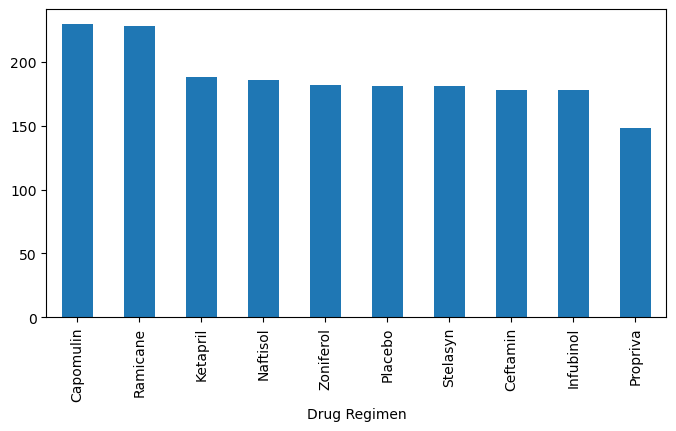

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
summary_timepoints = clean_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)
summary_timepoints.plot(kind="bar", x="Drug Regimen", y="# of observed Mouse/Timepoints", figsize=(8,4))
plt.show()

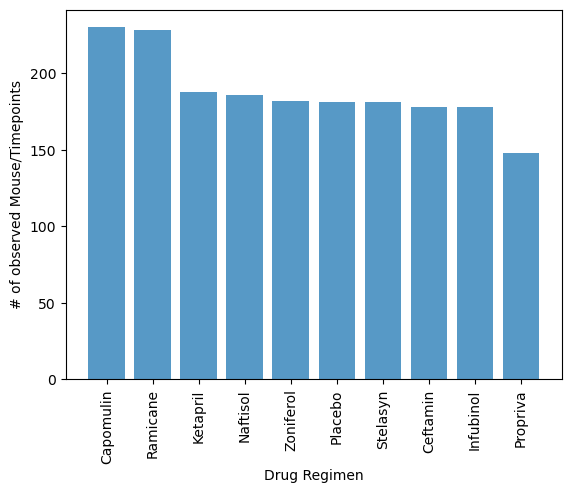

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = list(summary_timepoints.index)
y_axis = list(summary_timepoints)
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse/Timepoints")
plt.bar(x_axis, y_axis, alpha=0.75, align="center")
plt.xticks(x_axis, rotation="vertical")
plt.show()

<Axes: ylabel='Sex'>

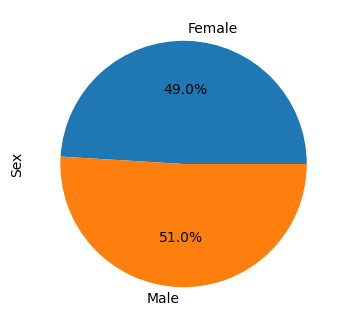

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
summary_sex_series = clean_df.groupby("Sex")["Mouse ID"].count()
summary_sex_series.name = "Sex"
# Plotting the pie chart
summary_sex_series.plot(kind="pie", autopct='%1.1f%%', figsize=(8,4))

Text(0, 0.5, 'Sex')

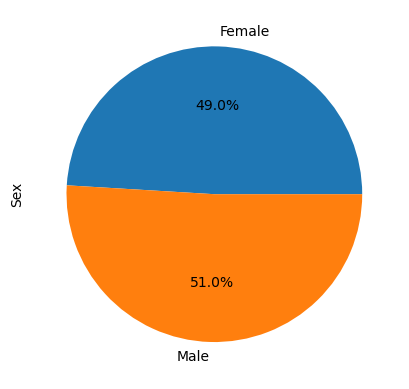

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart data
sizes = summary_sex_series
labels = list(summary_sex_series.index)

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
lastTimepoint_df = clean_df.groupby("Mouse ID").max()["Timepoint"]
merge_df = clean_df.merge(lastTimepoint_df, how="left", on="Mouse ID") 
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lastTimepoint_df = merge_df[merge_df["Timepoint_x"]==merge_df["Timepoint_y"]]
lastTimepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_per_regimen = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_df = lastTimepoint_df.loc[lastTimepoint_df["Drug Regimen"]==drug,:]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    tumor_vol_per_regimen.append(tumor_df["Tumor Volume (mm3)"])
    quartiles = tumor_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug}  is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")    
    print(f"Values above {upper_bound} could be outliers.")        
    # Determine outliers using upper and lower bounds
    outlilers_df = tumor_df[(tumor_df["Tumor Volume (mm3)"] < lower_bound) | (tumor_df["Tumor Volume (mm3)"] > upper_bound) ]  
    print(outlilers_df)

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin  is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint_x, Tumor Volume (mm3), Metastatic Sites, Timepoint_y]
Index: []
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane  is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint_x, Tumor Volume (mm3), Metastatic Sites, Timepoint_y]
Index: []
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol  is: 65.52574285
The interqua

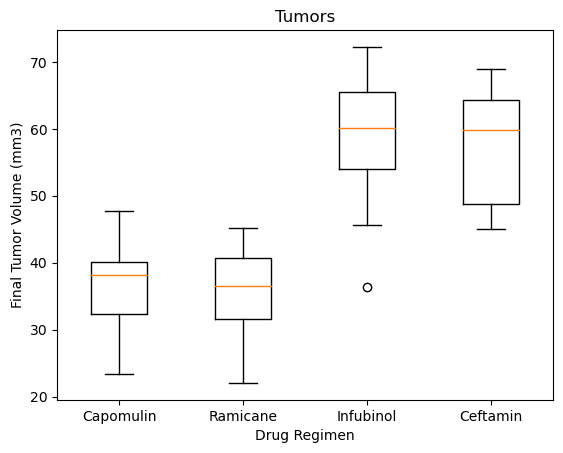

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_vol_per_regimen, labels=regimens)

plt.show()

## Line and Scatter Plots

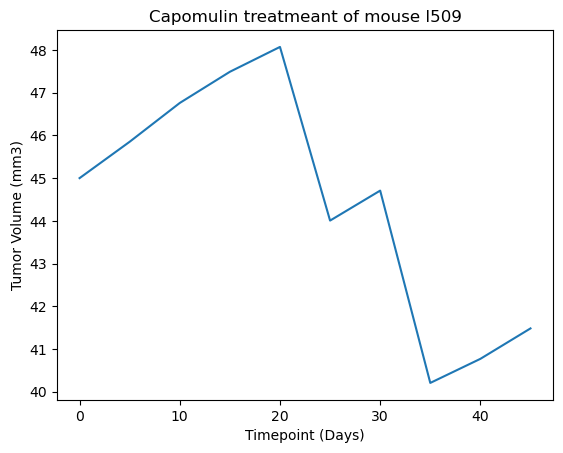

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = clean_df[clean_df["Mouse ID"]=="l509"]
x_axis = l509_df["Timepoint"]
y_axis = l509_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

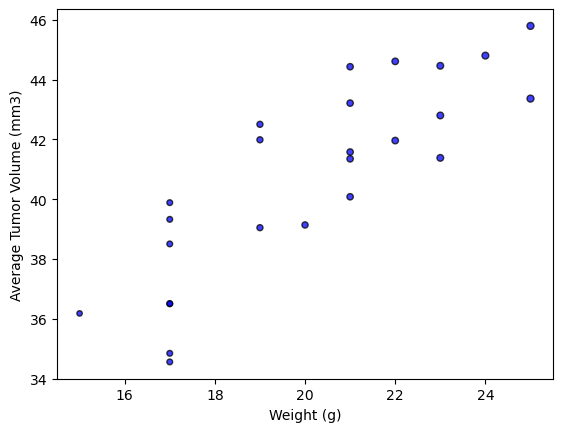

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"]=="Capomulin"]
#capomulin_mean
x_value = capomulin_df.groupby('Mouse ID')["Weight (g)"].mean()
y_value = capomulin_df.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()
plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black",
            s=x_value, alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


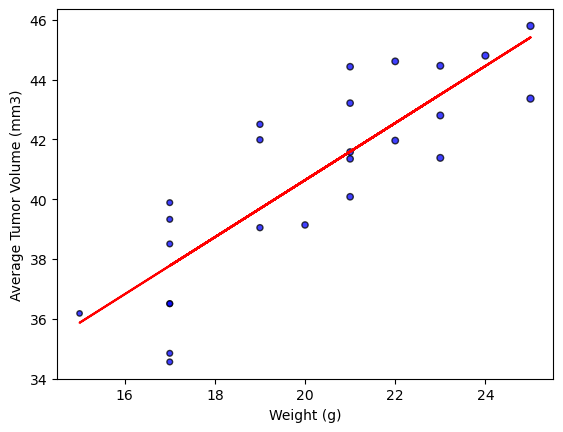

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_value = capomulin_df.groupby('Mouse ID')["Weight (g)"].mean()
y_value = capomulin_df.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()

correlation = st.pearsonr(x_value,y_value)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
model = st.linregress(x_value, y_value)
model

(slope, intercept, rvalue, pvalue, stderr) = model
regress_values = x_value * slope + intercept

plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black",
            s=x_value, alpha=0.75)

regress_values
plt.plot(x_value,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()